In [ ]:
import pandas as pd

# Load the datasets from the Excel files
df_features = pd.read_csv("Features.csv")
df_streams = pd.read_csv("Streams.csv")

# Merge the two datasets based on the song ID
df = pd.merge(df_features, df_streams, left_on="name", right_on="Song")

# Print the first few rows of the merged dataset to check the results
print(df.head())

                       id               name  duration  energy  key  loudness  \
0  0VjIjW4GlUZAMYd2vXMi3b    Blinding Lights      3.33   0.730    1    -5.934   
1  7qiZfU4dY1lWllzX7mPBI3       Shape of You      3.90   0.652    1    -3.183   
2  2XU0oxnq2qxCpomAAuJY8K       Dance Monkey      3.49   0.588    6    -6.400   
3  7qEHsqek33rTcFNT9PFqLf  Someone You Loved      3.04   0.405    1    -5.679   
4  0e7ipj03S05BNilyu5bRzt           Rockstar      3.64   0.520    5    -6.136   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0598       0.00146          0.000095    0.0897    0.334   
1     0       0.0802       0.58100          0.000000    0.0931    0.931   
2     0       0.0924       0.69200          0.000104    0.1490    0.513   
3     1       0.0319       0.75100          0.000000    0.1050    0.446   
4     0       0.0712       0.12400          0.000070    0.1310    0.129   

     tempo  danceability               Song                   

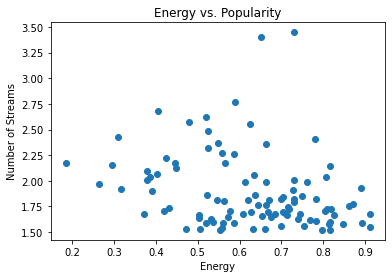

In [ ]:
import matplotlib.pyplot as plt

# Create a scatterplot of energy versus number of streams
plt.scatter(df["energy"], df["Streams (Billions)"])

# Add labels and a title to the plot
plt.xlabel("Energy")
plt.ylabel("Number of Streams")
plt.title("Energy vs. Popularity")

# Show the plot
plt.show()

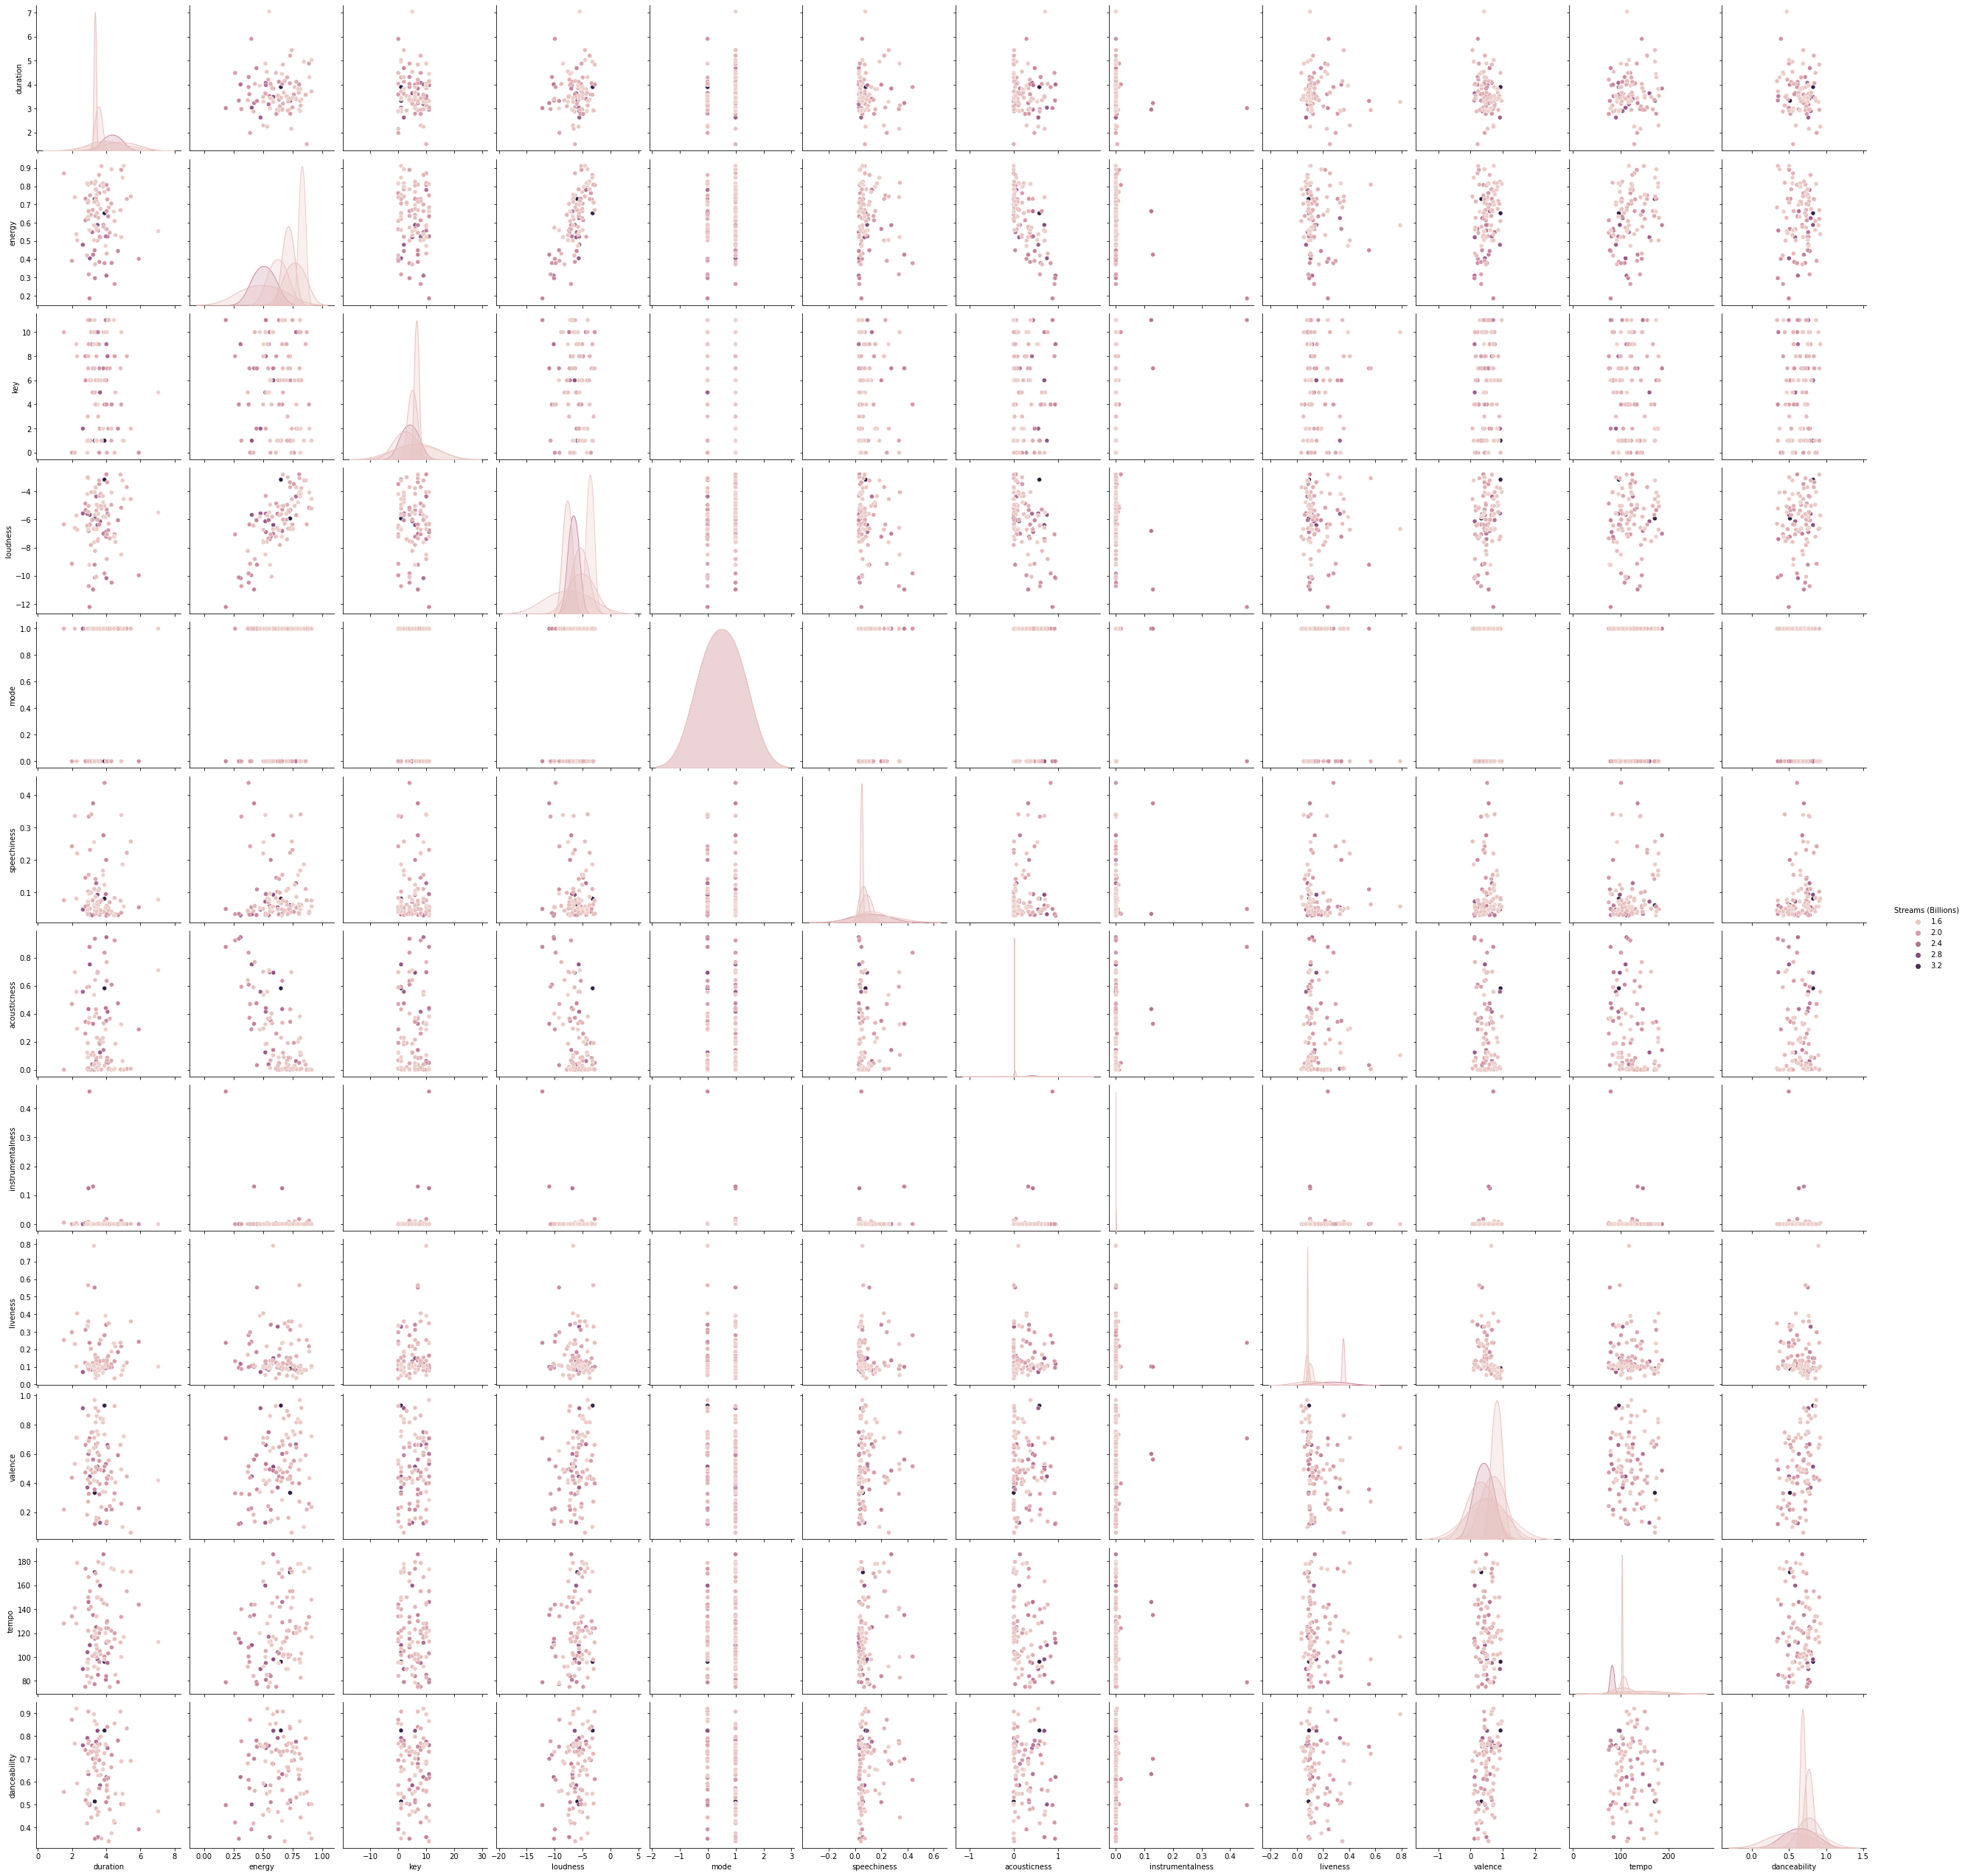

In [ ]:
import seaborn as sns

# create a scatter matrix of all features
sns.pairplot(data=df, vars=["duration", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness","liveness","valence","tempo","danceability"], hue='Streams (Billions)', height=3)


#energy and loudness

In [ ]:
df.columns

Index(['id', 'name', 'duration', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'danceability', 'Song', 'Artist',
       'Streams (Billions)', 'Release Date'],
      dtype='object')

In [ ]:
import statsmodels.api as sm

# Define the independent variables
X = df[["duration", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness","liveness","valence","tempo","danceability"]]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df["Streams (Billions)"]

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Streams (Billions)   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.392
Date:                Wed, 22 Mar 2023   Prob (F-statistic):              0.185
Time:                        16:18:37   Log-Likelihood:                -33.528
No. Observations:                 100   AIC:                             93.06
Df Residuals:                      87   BIC:                             126.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.0118      0.646  

In [ ]:
#It looks like loudness, instrumentalness, energy

The resulting heatmap shows the correlation coefficients between all pairs of features and between features and song popularity, with darker colors indicating higher correlation coefficients. You can use this visualization to identify the features that are most strongly correlated with song popularity.

Correlation analysis: You can compute the correlation coefficients between each song feature and song popularity, and select the features that have the highest absolute correlation coefficients. You can use a heatmap to visualize the correlations between all pairs of features and between features and song popularity.

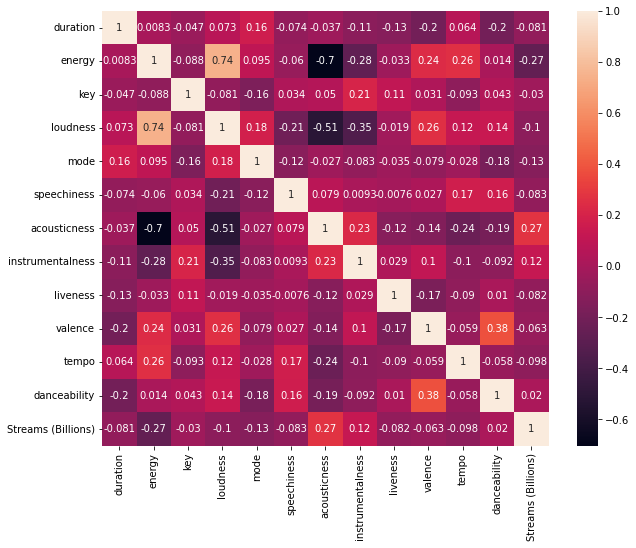

In [ ]:
# Select the relevant columns
columns = ['energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'danceability', 'Song', 'Artist',
       'Streams (Billions)', 'Release Date']
features_df = df[columns]

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the figure
fig = plt.figure(figsize=(10,8))

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True)

plt.show()

In [ ]:
X

,const,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,1.0,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514
1,1.0,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825
2,1.0,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824
3,1.0,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501
4,1.0,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,3.96,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765
96,1.0,4.45,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429
97,1.0,2.90,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548
98,1.0,3.82,0.797,2,-4.787,1,0.1530,0.19800,0.000000,0.0670,0.839,177.928,0.655


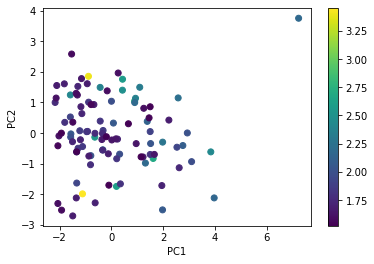

In [ ]:
from sklearn.decomposition import PCA

# Separate the features and the target variable
X = df.drop(['Streams (Billions)','id','Song','name','Artist','Release Date','speechiness','mode','duration'], axis=1)  # Features
y = df['Streams (Billions)']  # Target variable

from sklearn.preprocessing import StandardScaler

# assume X is your data matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Instantiate the PCA class
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(X_scaled)

# Transform your data into the principal component space
X_pca = pca.transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


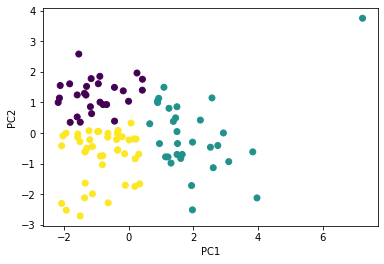

In [ ]:
from sklearn.cluster import KMeans

# assume X_pca is your PCA-transformed data matrix
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# plot the clusters on the PCA plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

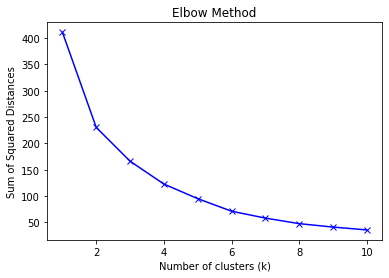

In [ ]:
import matplotlib.pyplot as plt

# create an array of SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# plot the SSE values for each k
plt.plot(range(1, 11), sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# define the model
model = LinearRegression()

# create the RFE model and select 2 features
rfe = RFE(model, n_features_to_select=2)

# fit the RFE model to the data
rfe.fit(X_scaled, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

"	energy	key	loudness	acousticness	instrumentalness	liveness	valence	tempo	danceability"
"energy, loudness"

[ True False  True False False False False False False]
[1 7 1 2 3 4 5 8 6]


'energy, loudness'

Model

In [ ]:
from sklearn.model_selection import train_test_split

# create a new dataset with only the selected features
X_selected = X.iloc[:,[0,2]]# replace [0, 2] with the indices of the selected features

# scale the selected dataset
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)

# train and evaluate the models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define models to test
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Evaluate each model using cross-validation
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Model: {model.__class__.__name__}  Mean R^2: {scores.mean():.3f}  Standard Deviation: {scores.std():.3f}")

Model: LinearRegression  Mean R^2: -0.425  Standard Deviation: 0.972
Model: DecisionTreeRegressor  Mean R^2: -1.794  Standard Deviation: 2.039
Model: RandomForestRegressor  Mean R^2: -0.612  Standard Deviation: 0.748


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print(grid_search.best_params_)

# Train the model using the best set of hyperparameters
rf_best = RandomForestRegressor(**grid_search.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

# Evaluate the performance of the model on a hold-out test set
score = rf_best.score(X_test, y_test)
print(f"R^2 score on test set: {score:.3f}")

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
R^2 score on test set: -0.088


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

# Define the hyperparameters to search over
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.05, 0.1, 0.2],
              'max_depth': [3, 5, 7],
              'subsample': [0.5, 0.8, 1.0],
              'colsample_bytree': [0.5, 0.8, 1.0],
              'reg_alpha': np.logspace(-4, 0, 5)}

# Create an XGBRegressor model with L1 regularization (Lasso)
model = XGBRegressor(objective='reg:squarederror', reg_alpha=0.1)

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and R^2 score on the test set
print("Best hyperparameters: ", grid_search.best_params_)
print("R^2 score on test set: ", grid_search.score(X_test, y_test))

Fitting 5 folds for each of 1215 candidates, totalling 6075 fits
Best hyperparameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0.001, 'subsample': 0.8}
R^2 score on test set:  -0.30647306997560597


In [ ]:
# We may have to go back to more exploratory data analysis or try more complicated models and include more features